# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [3]:
# Output File (CSV)
output_data_file = "output/cities.csv"
#city_data = pd.read_csv(output_data_file)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#city_data

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



626

In [5]:
cities

['arman',
 'alotau',
 'busselton',
 'airai',
 'butaritari',
 'naze',
 'rikitea',
 'puerto ayora',
 'ponta do sol',
 'tautira',
 'narsaq',
 'koungheul',
 'georgetown',
 'thompson',
 'mareeba',
 'new norfolk',
 'ribeira grande',
 'talnakh',
 'illoqqortoormiut',
 'punta arenas',
 'peniche',
 'parfenyevo',
 'port elizabeth',
 'gat',
 'panino',
 'yellowknife',
 'atuona',
 'taolanaro',
 'hamilton',
 'cam ranh',
 'jamestown',
 'tuktoyaktuk',
 'biltine',
 'vaitupu',
 'palabuhanratu',
 'marcona',
 'wawa',
 'qaanaaq',
 'avera',
 'bluff',
 'bandar',
 'tsihombe',
 'havoysund',
 'cockburn town',
 'castro',
 'ulaangom',
 'plyussa',
 'nizhneyansk',
 'port alfred',
 'kaitangata',
 'gayny',
 'tilichiki',
 'goderich',
 'nome',
 'lebu',
 'rio gallegos',
 'isangel',
 'hermanus',
 'mackay',
 'amderma',
 'jumla',
 'albany',
 'saint-joseph',
 'sola',
 'norsup',
 'mys shmidta',
 'victoria',
 'hargeysa',
 'limulunga',
 'sumbawa',
 'klyuchi',
 'nikolskoye',
 'upernavik',
 'mirabad',
 'cururupu',
 'pevek',
 'xin

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
sample_city = ["ostrovnoy","zhuhai","Hars", "New York","new norfolk"]
#cities = []
#response = requests.get(query_url + "Paris").json()


# set up lists to hold reponse info
lat = []
lon = []
max_temp = []
humidity = []
cloud = []
wind_speed = []
city_name = []
country =[]
date =[]

city_id = 1


# Loop through the list of cities and perform a request for data on each
for city in cities:
#for city in sample_city: 
    response = requests.get(query_url + city).json()
    
    try:
        lat.append(response['coord']['lat'])
        lon.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing {city_id} - {city} found")
        print("----------")
        city_id += 1
#response
        #print(json.dumps(response, indent=4, sort_keys=False))
    
    except:
        print(f"{city} not found, skipping")
        print("------------")
        pass
        

Processing 1 - arman found
----------
alotau not found, skipping
------------
Processing 2 - busselton found
----------
Processing 3 - airai found
----------
Processing 4 - butaritari found
----------
Processing 5 - naze found
----------
Processing 6 - rikitea found
----------
Processing 7 - puerto ayora found
----------
Processing 8 - ponta do sol found
----------
Processing 9 - tautira found
----------
Processing 10 - narsaq found
----------
Processing 11 - koungheul found
----------
Processing 12 - georgetown found
----------
Processing 13 - thompson found
----------
Processing 14 - mareeba found
----------
Processing 15 - new norfolk found
----------
Processing 16 - ribeira grande found
----------
Processing 17 - talnakh found
----------
illoqqortoormiut not found, skipping
------------
Processing 18 - punta arenas found
----------
Processing 19 - peniche found
----------
Processing 20 - parfenyevo found
----------
Processing 21 - port elizabeth found
----------
Processing 22 - gat

Processing 179 - amahai found
----------
Processing 180 - fortuna found
----------
Processing 181 - canete found
----------
Processing 182 - ishinomaki found
----------
lolua not found, skipping
------------
Processing 183 - khatanga found
----------
Processing 184 - poum found
----------
Processing 185 - aripuana found
----------
Processing 186 - dickinson found
----------
Processing 187 - oussouye found
----------
Processing 188 - tripoli found
----------
Processing 189 - skibbereen found
----------
Processing 190 - pacific grove found
----------
Processing 191 - klaksvik found
----------
Processing 192 - kapaa found
----------
Processing 193 - ocotal found
----------
Processing 194 - suba found
----------
Processing 195 - pangnirtung found
----------
Processing 196 - upington found
----------
Processing 197 - nenjiang found
----------
Processing 198 - nelson bay found
----------
Processing 199 - shitanjing found
----------
Processing 200 - grand gaube found
----------
Processing 201

Processing 358 - saint augustine found
----------
Processing 359 - diego de almagro found
----------
Processing 360 - quatre cocos found
----------
Processing 361 - mitsamiouli found
----------
Processing 362 - ust-maya found
----------
Processing 363 - biak found
----------
Processing 364 - san miguel de cauri found
----------
Processing 365 - nagato found
----------
Processing 366 - illela found
----------
Processing 367 - abha found
----------
sogdiondon not found, skipping
------------
Processing 368 - hasaki found
----------
Processing 369 - college found
----------
Processing 370 - laguna found
----------
Processing 371 - berlevag found
----------
Processing 372 - bardiyah found
----------
Processing 373 - raychikhinsk found
----------
Processing 374 - zaozerne found
----------
Processing 375 - sayyan found
----------
Processing 376 - sangueya found
----------
Processing 377 - mindyak found
----------
temaraia not found, skipping
------------
Processing 378 - comodoro rivadavia f

Processing 537 - gamba found
----------
Processing 538 - medvedevo found
----------
Processing 539 - kasempa found
----------
Processing 540 - chapais found
----------
Processing 541 - staraya vichuga found
----------
Processing 542 - imperial beach found
----------
Processing 543 - choma found
----------
Processing 544 - port macquarie found
----------
Processing 545 - bronnoysund found
----------
Processing 546 - pauini found
----------
Processing 547 - mehamn found
----------
Processing 548 - santa maria found
----------
Processing 549 - talara found
----------
Processing 550 - margate found
----------
Processing 551 - beringovskiy found
----------
Processing 552 - nautla found
----------
Processing 553 - abu dhabi found
----------
Processing 554 - shimoda found
----------
ozgon not found, skipping
------------
Processing 555 - marystown found
----------
Processing 556 - ancud found
----------
Processing 557 - savannakhet found
----------
Processing 558 - vulcan found
----------
bos

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#api dataframe
city_data = pd.DataFrame({
    "City":city_name,
    "Country":country,
    "Max Temp": max_temp,
    "Date":date,
   "Cloudiness":cloud,
   "Lat":lat,
    "Lng":lon,
    "Wind Speed": wind_speed,
    "Humidity":humidity})

city_data

,City,Country,Max Temp,Date,Cloudiness,Lat,Lng,Wind Speed,Humidity
0,Arman',RU,25.45,1619561790,11,59.7000,150.1667,3.20,78
1,Busselton,AU,54.00,1619561791,40,-33.6500,115.3333,3.76,97
2,Airai,TL,56.30,1619561791,10,-8.9266,125.4092,1.57,67
3,Butaritari,KI,82.47,1619561751,71,3.0707,172.7902,11.21,76
4,Naze,JP,68.00,1619561636,40,28.3667,129.4833,12.66,64
...,...,...,...,...,...,...,...,...,...
583,Agirish,RU,32.31,1619561695,5,61.9247,63.0231,4.79,88
584,Porto-Novo,BJ,82.74,1619561745,93,6.4965,2.6036,8.72,81
585,Kutum,SD,75.29,1619561934,13,14.2000,24.6667,7.23,13
586,Koltubanovskiy,RU,41.54,1619561934,78,52.9407,52.0269,10.85,79


In [8]:
city_data.to_csv("WeatherPy/WeatherPy.csv",encoding="utf-8",index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
clean_city_data = city_data.loc[city_data["Humidity"] <= 100]
clean_city_data

,City,Country,Max Temp,Date,Cloudiness,Lat,Lng,Wind Speed,Humidity
0,Arman',RU,25.45,1619561790,11,59.7000,150.1667,3.20,78
1,Busselton,AU,54.00,1619561791,40,-33.6500,115.3333,3.76,97
2,Airai,TL,56.30,1619561791,10,-8.9266,125.4092,1.57,67
3,Butaritari,KI,82.47,1619561751,71,3.0707,172.7902,11.21,76
4,Naze,JP,68.00,1619561636,40,28.3667,129.4833,12.66,64
...,...,...,...,...,...,...,...,...,...
583,Agirish,RU,32.31,1619561695,5,61.9247,63.0231,4.79,88
584,Porto-Novo,BJ,82.74,1619561745,93,6.4965,2.6036,8.72,81
585,Kutum,SD,75.29,1619561934,13,14.2000,24.6667,7.23,13
586,Koltubanovskiy,RU,41.54,1619561934,78,52.9407,52.0269,10.85,79


In [19]:
#  Get the indices of cities that have humidity over 100%.
clean_city_data.describe()

,Max Temp,Date,Cloudiness,Lat,Lng,Wind Speed,Humidity
count,588.000000,5.880000e+02,588.000000,588.000000,588.000000,588.000000,588.000000
mean,60.400068,1.619562e+09,57.338435,22.164905,15.779731,7.387789,71.397959
std,20.188921,1.418140e+02,37.767505,32.661307,90.777983,4.836952,22.570159
min,4.660000,1.619561e+09,0.000000,-54.800000,-179.166700,0.070000,7.000000
25%,46.000000,1.619562e+09,20.000000,-4.431625,-66.011375,3.440000,60.000000
50%,63.335000,1.619562e+09,75.000000,25.743250,20.891700,6.580000,78.000000
75%,77.525000,1.619562e+09,95.000000,50.010850,99.571275,10.360000,88.000000
max,108.180000,1.619562e+09,100.000000,78.218600,179.316700,25.320000,100.000000


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

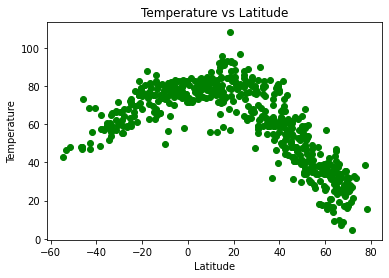

In [12]:
#Temp vs Lat   #change df name

plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"], marker="o", color="green")
plt.title("Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig('WeatherPy/temp_lat.png')
plt.show()


## Latitude vs. Humidity Plot

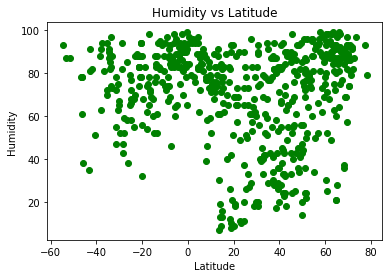

In [13]:
#Humidity vs Lat #change df name

plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"], marker="o", color="green")
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('WeatherPy/hum_lat.png')
plt.show()

## Latitude vs. Cloudiness Plot

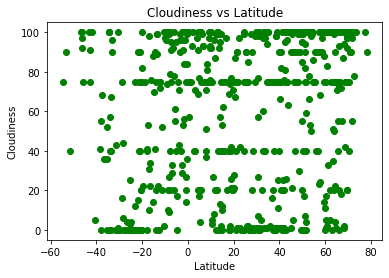

In [14]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"], marker="o", color="green")
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('WeatherPy/cloud_lat.png')
plt.show()

## Latitude vs. Wind Speed Plot

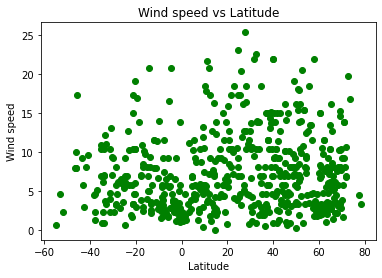

In [15]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"], marker="o", color="green")
plt.title("Wind speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
plt.savefig('WeatherPy/wind_lat.png')
plt.show()

## Linear Regression

In [16]:
north = clean_city_data.loc[(clean_city_data["Lat"] >= 0)]
north
south = clean_city_data.loc[(clean_city_data["Lat"] <= 0)]
south

,City,Country,Max Temp,Date,Cloudiness,Lat,Lng,Wind Speed,Humidity
1,Busselton,AU,54.00,1619561791,40,-33.6500,115.3333,3.76,97
2,Airai,TL,56.30,1619561791,10,-8.9266,125.4092,1.57,67
5,Rikitea,PF,77.52,1619561584,12,-23.1203,-134.9692,10.25,70
6,Puerto Ayora,EC,82.40,1619561539,20,-0.7393,-90.3518,13.80,78
8,Tautira,PF,87.80,1619561625,40,-17.7333,-149.1500,6.91,62
...,...,...,...,...,...,...,...,...,...
574,Kerema,PG,78.75,1619561931,100,-7.9631,145.7785,1.86,84
575,Lagunas,PE,75.11,1619561931,95,-5.2269,-75.6753,2.82,96
577,Puerto Quijarro,BO,75.34,1619561932,0,-17.7833,-57.7667,3.83,54
579,Altamira,BR,82.40,1619561933,40,-3.2033,-52.2064,2.30,83


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

TypeError: annotate() missing 1 required positional argument: 'xy'

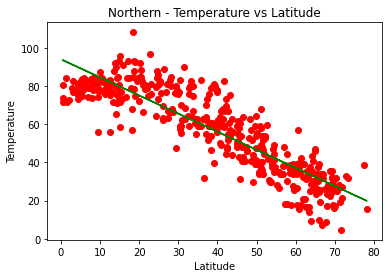

In [17]:
x_values = north["Lat"]
y_values = north["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title("Northern - Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(line_eq,loc="best",fontsize=15,color="green")
plt.savefig('WeatherPy/north_temp_lat.png')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:

x_values = north["Lat"]
y_values = north["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title(" Northern - Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(50,12),fontsize=15,color="green")
plt.savefig('WeatherPy/north_hum_lat.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = north["Lat"]
y_values = north["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title(" Northern - Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(75,5),fontsize=15,color="green")
plt.savefig('WeatherPy/north_cloud_lat.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = north["Lat"]
y_values = north["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "red")
plt.plot(x_values,regress_values,"r-",color = "green")
plt.title(" Northern - Wind speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.annotate(line_eq,(0,29),fontsize=15,color="green")
plt.savefig('WeatherPy/north_wind_lat.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = south["Lat"]
y_values = south["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Northern - Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.annotate(line_eq,(-25,40),fontsize=15,color="green")
plt.savefig('WeatherPy/south_temp_lat.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = south["Lat"]
y_values = south["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Southern - Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-55,20),fontsize=15,color="green")
plt.savefig('WeatherPy/south_hum_lat.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = south["Lat"]
y_values = south["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Southern - Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(-10,0),fontsize=15,color="green")
plt.savefig('WeatherPy/south_cloud_lat.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = south["Lat"]
y_values = south["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,color = "blue")
plt.plot(x_values,regress_values,"r-",color="green")
plt.title("Southern - Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.annotate(line_eq,(-30,40),fontsize=15,color="green")
plt.savefig('WeatherPy/south_wind_lat.png')
plt.show()